In [1]:
# importiamo le librerie necessarie e dichiariamo il path relativo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

# explorative analysis on Phisics course
path = '/Users/robertagalici/Desktop/EdnetReal/data/Dati_Moodle/Nuovi/'

In [3]:
# calcoliamo il numero di utenti e il numero di interazioni per corso
header = ['timestamp', 'user_id', 'user_involved', 'context', 'component', 'event', 'description', 'origin', 'ip']

course_name = []
no_interactions = []
no_user = []

for fname in os.listdir(path):
    if not fname.endswith(".csv"):
        continue
    df = pd.read_csv(os.path.join(path, fname), sep=',', encoding='utf-8')
    df.columns = header
    df1 = df[df["user_id"].str.contains("Moodle Analitycs")==False]
    df2 = df1[df1["user_id"].str.contains("-")==False]
    
    students_names = df1["user_id"]
    
    course_name.append(fname.split('_')[1])
    no_interactions.append(len(df2.index))
    no_user.append(len(df2['user_id'].unique()))

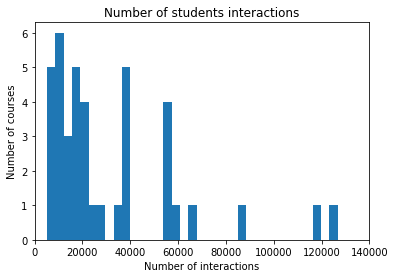

In [4]:
plt.hist(no_interactions, bins=35)
plt.xlim(0, 140000)
plt.title("Number of students interactions")
plt.xlabel("Number of interactions")
plt.ylabel("Number of courses")
plt.show()

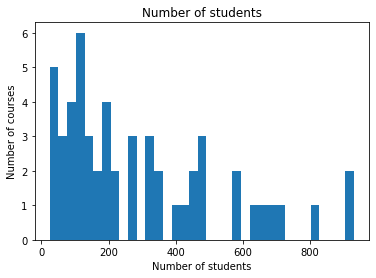

In [4]:
plt.hist(no_user, bins=35)
plt.title("Number of students")
plt.xlabel("Number of students")
plt.ylabel("Number of courses")
plt.show()

In [120]:
# Leggo il dataframe che contiene i corsi, le interazioni, gli utenti, il corso/gruppo di appartentenza e l'anno

df_course_stats = pd.read_csv('course_stats.csv', sep=',')
df_course_stats

,Course,Interactions,Users,DegreeCourse,Year
0,_fisica_1,126770,931,IEL,1
1,_geometria_e_algebra,118559,918,IEL,1
2,_statistica,54962,807,EGA,1
3,_privato,21866,714,EGA,1
4,_fisica_2,57066,683,IEL,1
5,_diritto_privato_9_cfu,59518,662,AEO,1
6,_inglese__esame_,16490,643,EGA,2
7,_elettrotecnica,56772,593,IEL,2
8,_antropologia_culturale,53959,581,BECS,1
9,_programmazione_e_controllo,24311,489,EGA,2


- nuovo path
- quanti utenti hanno completato tutte le lezioni, quale è la distribuzione del numero di interazioni per studente, per ogni corso (5 corsi)? percentuale di studenti che hanno completato tutte le attività , aggiungere nuova colonna che va tra 0-1 (es. 0.5 metà corso completato), nella tabella sopra livello temporale: dato unn corso, es fisica, creare un plot dove nelle x abbiamo le settimane (1, 2, 3, 4..), asse y numero di interazioni o numero di studenti che hanno fatto almeno un'interazione durante la settimana.
- dato un corso, creare un plot dove nell'asse x abbiamo le settimane e nell'asse y abbiamo il numero di studenti la cui ultima interazione risale a quella  settimana del corso
- dato lo stesso corso, mettere nelle x le settimane e nelle y la media delle attività completate dagli utenti che hanno abbandonato nella settimana es. settimana 2: sappiamo gli utenti che hanno abbandonato nella settimana 2, per ognuno di questi utenti contiamo quante attività ha completato (calcoliamo la  percentuale di attività del corso completata), facciamo la media tra gli utenti della settimana 2 e mostriamo nell'asse y la media. farlo per tutte le settimane

In [6]:
def calculate_completion(data):
    course_completion = []
    for index, row in data.iterrows():
        completion = []
        for column in data.columns:
            if 'Unnamed' not in column and 'Codice identificativo' not in column and 'Indirizzo email' not in column:
                completion.append(0 if 'Non' in row[column] else 1)
        course_completion.append(completion)
    return course_completion

In [7]:
def calculate_percentage(data):
    course_percentage = []
    for index, row in data.iterrows():
        completion = []
        for column in data.columns:
            if 'Unnamed' not in column and 'Codice identificativo' not in column and 'Indirizzo email' not in column:
                completion.append(0 if 'Non' in row[column] else 1)
        course_percentage.append(np.mean(completion))
    return course_percentage

In [8]:
def calculate_m(course_completion):
    m = np.array(course_completion)
    return m

In [9]:
def calculate_avg(m):
    avg_m = np.mean(m, axis=0)
    return avg_m

In [10]:
def course_percentage_plot(course_percentage, course_n, degree):
    plt.hist([x for x in course_percentage if x>0], bins=35)
    plt.title(course_n+' '+degree) # mettere nome di ogni corso
    plt.xlabel("Completion percentage")
    plt.ylabel("Number of students")

In [11]:
# percentuale di utenti che hanno completato quell'attivita del corso
# es. il 17% fa le prime 5 attivita
def avg_plot(avg_m, course_n, degree):
    plt.plot(avg_m)
    plt.title("Trend "+course_n+' '+degree)
    plt.xlabel("Number of activities")
    plt.ylabel("Student percentage")

In [12]:
# per quanti utenti la prima attivita risulta essere l'ultima: per ogni utente sapremo l'ultima attivita completata
# capire quando un utente si ferma durante il corso
# se un utente non ha completato attivita mettiamo -1
def no_course_activities(m, course_n, degree):
    a = np.zeros(m.shape[1] + 1)
    for r in m:
        b = np.argwhere(r>0)
        i = 0 if len(b)==0 else b[-1][0]+1
        a[i]+= 1
    plt.plot(a[1:])
    plt.title(course_n+' '+degree)
    plt.xlabel("Number of activities")
    plt.ylabel("Number of students")

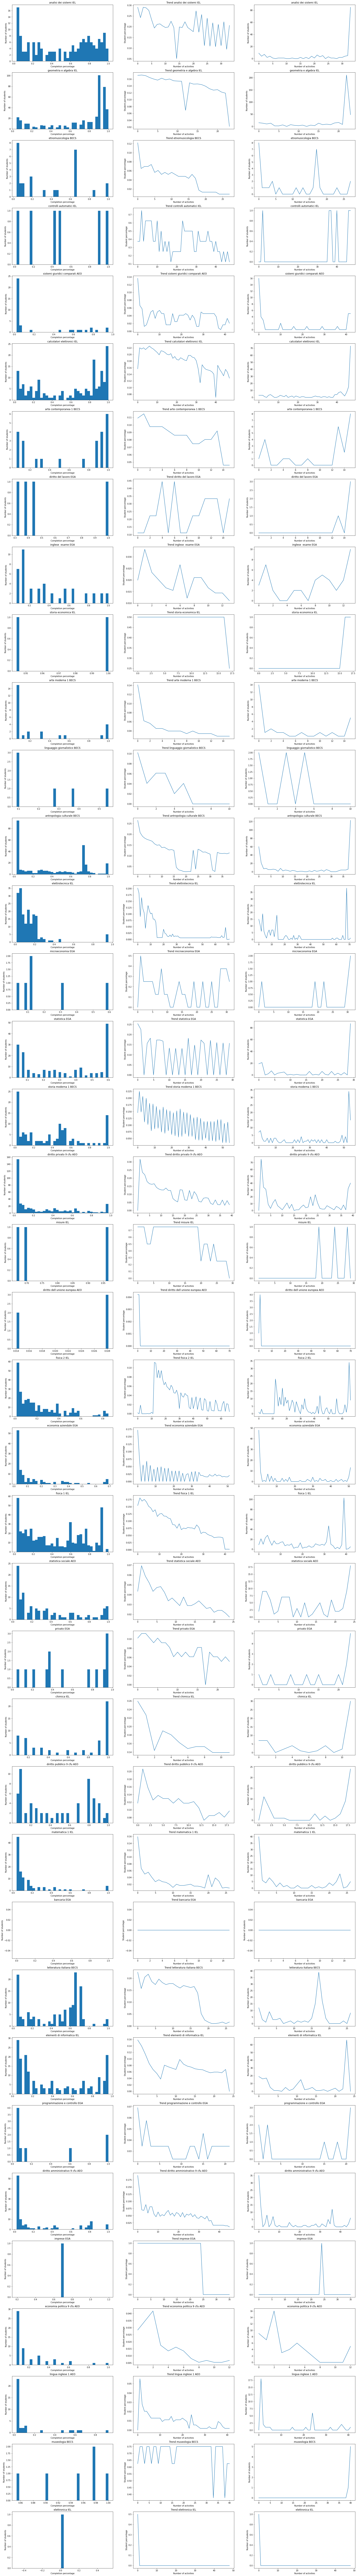

In [24]:
# Eseguo i plot per ogni corso di laurea
new_path = '/Users/robertagalici/Desktop/EdnetReal/data/Dati_Moodle/Progress/'

plt.figure(figsize=(30, 230))
findex=0
i=1

for fname in os.listdir(new_path):
    if not fname.endswith(".csv"):
        continue

    course_nameSplit = fname.split('-')[-1]
    course_n = os.path.splitext(course_nameSplit)[0] # it contains the name of each course
    degree = df_course_stats[df_course_stats['Course'].str.contains(course_n)]['DegreeCourse'].values[0]
    course_n = course_n.replace('_', ' ').strip()
    
    data = pd.read_csv(os.path.join(new_path, fname), sep=',')
    completion = calculate_completion(data)
    percentage = calculate_percentage(data)
    m = calculate_m(completion)
    avg = calculate_avg(m)
    
    plt.subplot(38,3,findex*3+1)
    plot_percentage = course_percentage_plot(percentage, course_n, degree)
    plt.subplot(38,3,findex*3+2)
    plot_avg = avg_plot(avg, course_n, degree)
    plt.subplot(38,3,findex*3+3)
    plot_act = no_course_activities(m, course_n, degree)
    findex+=1
    i+=1
    
plt.show()

- nome corso (ok, da sistemare meglio eventualmente), xlabel, ylabel -> Etnomusicologia_20210610
- analizzare dropout studenti: analisi esplorativa dropout, analizzare i modelli di dropout in base agli attributi sensibili, analizzare i modelli di dropout: Avere un paper per LAK 2022: 4 Oct 2021: Deadline for submission -> https://www.solaresearch.org/events/lak/lak22/general-call/
- LOGICA: non ci sono attivita nel moodle
- Consideriamo i progress dei corsi che hanno almeno 100 studenti
- progress.ega_-_matematica_generale non viene letto correttamente, da errore

- I pattern più frequenti e quali corsi hanno pattern simili
- GRAFICI COLONNA 1: Rappresentano la percentuale di completamento delle attivita per studenti.
    Es. in Museologia, il 100 studenti hanno completato il 90% del corso, 190 il 98% e 100 il 100%
    la maggior parte degli studenti completano la prima lezione 
    ci sono diversi casi di dropdown diritto dell'unione europea, misure e storia economica: seguono prima e ultima lezione e basta

- GRAFICI COLONNA 2: Rappresentano i Trend, ovvero la percentuale di studenti per singola attività
    Es. Museologia, il 62% degli studenti ha completato la lezione 0, il 75% ha completato la lezione dalla 10 alla 15 e dalla 18 alla 32
    L'andamento generale è quello di decrescita
- GRAFICI COLONNA 3: Rappresentano per ogni utente l'ultima attivita completata
    Es. per 60 studenti, l'ultima attività completata è la prima, per 15 studenti l'ultima è la 9, mentre per 120 studenti l'ultima completata è la 36
    In generale, sono pochi gli studenti che completano tutte le attività fino alla fine, la maggior parte si ferma alle prime e poi abbandona

In [14]:
# Read CSV copied from Moodle
df = pd.read_csv('ciao.csv', sep='\t', header=None)
print('Found {} lines'.format(len(df.index)))

# Prepare data structures for saving userids and groups
userids = []
groups = []

# Initializa a counter to go over the dataframe rows
i = 0

while i < len(df.index): # Until we do not go over all dataframe rows

    if df.iloc[i][0] == 'Attiva ': # Special case
        i += 1

    # Retrieve the user id and the group
    userid = 'firstaname_' + str(int(df.iloc[i][2])) + ' lastname_' + str(int(df.iloc[i][2]))
    group = df.iloc[i+1][0]

    # Store them
    userids.append(userid)
    groups.append(group)

    # Got to the next user
    i += 4

# Create a dataframe with user ids and groups
df_groups = pd.DataFrame(zip(userids, groups), columns=['user_id', 'group'])
print('Found {} users'.format(len(df.index)))

print(df_groups)

Found 40 lines
Found 40 users
                           user_id  \
0    firstaname_1006 lastname_1006   
1  firstaname_11342 lastname_11342   
2  firstaname_11418 lastname_11418   
3  firstaname_11421 lastname_11421   
4  firstaname_11422 lastname_11422   
5  firstaname_11423 lastname_11423   
6  firstaname_11427 lastname_11427   
7  firstaname_11434 lastname_11434   
8  firstaname_11435 lastname_11435   
9  firstaname_11436 lastname_11436   

                                         group  
0   EL5_BIOFARM_50/24 - I anno gruppo globale   
1               EL5_SCIENZE_20-21_60_58_1anno   
2     EL5_INGARC_70-77-2-3anno gruppo globale   
3     EL5_INGARC_70-77-2-3anno gruppo globale   
4  EL5_BIOFARM_50/22_altrianni gruppo globale   
5                                Senza gruppi   
6     EL5_SCIENZE_60/61partime gruppo globale   
7  EL5_BIOFARM_50/24_altrianni gruppo globale   
8  EL5_BIOFARM_50/24_altrianni gruppo globale   
9  EL5_BIOFARM_50/24_altrianni gruppo globale   


Corsi:
- IEL: Corso di Laurea in Ingegneria Elettrica, Elettronica e Informatica
    - Fisica 1 (1 anno)
    - Elettrotecnica (2 anno)
    - Elementi di informatica (1 anno)
    - Misure Elettriche ed Elettroniche (2 anno)
    - Analisi e Controllo dei Sistemi Dinamici – Controlli Automatici (2 anno)
    - Fisica Tecnica (2 anno)
    - Geometria e algebra (1 anno)
    - Fisica 2 (1 anno)
- EGA: Corso di Laurea in Economia e Gestione Aziendale
    - Statistica (1 anno)
    - Matematica Generale (1 anno)
    - Diritto del lavoro (3 anno)
    - Diritto Privato (1 anno)
    - Tecnica bancaria (3 anno)
    - Inglese (esame) (2 anno)
    - Microeconomia (1 anno)
- AEO: Corso di Laurea in Amministrazione e Organizzazione
    - Sistemi Giuridici Comparati (2 anno)
    - Psicologia dei gruppi e comunicazione (2 anno)
    - Statistica Sociale (2 anno)
    - Diritto dell'Unione Europea (2 anno)
    - Amministrazione ed Etica (2 anno)
    - Diritto amministrativo 9 CFU (2 anno)
- COM: Corso di Laurea in Scienze della Comunicazione
    - Logica e teoria dell'argomentazione 19/20 (1 anno)
- BECS: Corso di Laurea in Beni Culturali e Spettacolo
    - Storia Moderna 1 (1 anno)
    - Museologia (1 anno)
    - Teoria e Storia della Fotografia (2 anno)
    - Linguaggio Giornalistico (1 anno)
    - Letteratura Italiana (1 anno)
    - Antropologia Culturale (1 anno)
- FILCOM: Corso di laurea in Filosofia e teorie della comunicazione
    - Storia della comunicazione politica in età contemporanea 14/15 (1 anno)
    - Filosofia morale 14/15 (1 anno)



In [123]:
user = []
course = []
year = []
group = []
drop_week = []
activity_week = []
activity_completion = []
completion = []


for fname in os.listdir(path):
    if not fname.endswith(".csv"):
        continue
    df = pd.read_csv(os.path.join(path, fname), sep=',', encoding='utf-8')
    df.columns = header
    df1 = df[df["user_id"].str.contains("Moodle Analitycs")==False]
    df2 = df1[df1["user_id"].str.contains("-")==False]
    
    for user_id, user_group in df2.groupby(by='user_id'):
        user.append(user_id)
        
        for c in user_group['context'].unique():
            if c.startswith('Corso:'):
                course.append(c.split(':')[-1])
        
        course_tmp = course[-1].lower().replace(" ", "_") # es. trasforma Storia economica in -> _storia_economica
        course_t = df_course_stats[df_course_stats['Course'].str.contains(course_tmp)]
        
        
        if len(course_t) == 0:
            continue
        
        year_c = course_t['Year'].values[0]
        year.append(year_c)
        
        
        group_c = course_t['DegreeCourse'].values[0]
        group.append(group_c)
       # print(course_tmp, group_c)
        

       
        # period -> Durata del corso totale
        # numero di settimane totale
 
        
        # activity_week -> per ogni settimana ci dice quante attività ha fatto quell'utente in quel determinato corso
        # array delle settimane (vedi sotto)
        
        # drop_week -> Settimana in cui l'utente ha mollato il corso
        # array per ogni studente, lungo tante quante settimane ha il corso, per ogni settimana conti le interazioni che l'utente ha fatto nella piattaforma
        # activity_week -> [3, 2, 0, 4, 0, 0] -> corso con 6 settimane, numero di attività dello studente per ogni settimana (numero di interazioni)
        # trovare l'ultima settimana in cui ha interagito, in questo caso la settimana
        # drop_week -> [3]
        
               
        # activity_completion -> percentuale di attività completata in quel corso
        # se ci sono 10 attività del corso, quanti di questi saranno completati? 8? allora 0.8
        
        
        # completion -> completamento di tutte le attività (0 se non le ha completate e 1 se le ha completate tutte)
        # if activity_completion==1 -> 1 altrimenti 0

        
# Obiettivo:
# date le interazioni di un utente, fino alla settimana 2, predice se lo studente interagirà da settimana 2 in poi
# input: interazioni fino alla settimana x
# output: 0, 1 -> 1 se lo studente ha mollato alla settimana 3 (dropweek == 3), altrimenti 0
# misuriamo accuratezza ecc
# per fairness, esempio -> predire errore per i maschi, per le femmine, se c'è differenza -> unfairness

/Users/robertagalici/Desktop/EdnetReal/venv/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Creare un csv globale con le seguenti colonne
User_id (first_name), Corso, Anno, Gruppo (ING), Settimana in cui ha mollato, Durata del corso totale, Lista (per ogni settimana dice quante attività quell'utente ha fatto in quel corso), Attività (percentuale di attività completata in quel corso), completamento (0 se non le ha completate e 1 se le ha completate tutte)

first_name01 last_name01, Fisica1, 1 anno, INF 01, 3, 10, [0 0 0 0 10 2 0 0 0 0], 0.43%, 0

Come posso riempire il csv?
Prima colonna: inserire tutti gli studenti -> students_names li contiene tutti
students_names = df1["user_id"]

es. course_stats = pd.DataFrame(list(zip(course_name, no_interactions, no_user)), columns =['Course', 'Interactions', 'Users'])

Per ogni studente e per ogni corso che segue, inserire tutte le info

In [56]:
# Storia economica: EGA
# Economia politica: AEO 1 anno

In [124]:
df_course_stats.columns

Index(['Course', 'Interactions', 'Users', 'DegreeCourse', 'Year'], dtype='object')

In [125]:
df_final = pd.DataFrame(list(zip(user, course, year, group)), columns = ['User_id','Course', 'Year', 'Group'])
print(df_final)

                             User_id                Course  Year Group
0          firstaname_10 lastname_10   Diritto del  lavoro     2   AEO
1          firstaname_12 lastname_12   Diritto del  lavoro     2   AEO
2      firstaname_1247 lastname_1247   Diritto del  lavoro     2   AEO
3      firstaname_1250 lastname_1250   Diritto del  lavoro     2   AEO
4      firstaname_1272 lastname_1272   Diritto del  lavoro     2   AEO
...                              ...                   ...   ...   ...
10022  firstaname_7166 lastname_7166       Diritto Privato     2   AEO
10023  firstaname_7171 lastname_7171       Diritto Privato     2   AEO
10024  firstaname_7172 lastname_7172       Diritto Privato     2   AEO
10025  firstaname_7177 lastname_7177       Diritto Privato     2   AEO
10026  firstaname_7181 lastname_7181       Diritto Privato     2   AEO

[10027 rows x 4 columns]


In [59]:
print(df2)

             timestamp                          user_id user_involved  \
1     27/02/2021 11:17  firstaname_15347 lastname_15347             -   
2     27/02/2021 11:04  firstaname_15347 lastname_15347             -   
3     16/02/2021 10:44  firstaname_15347 lastname_15347             -   
4     12/02/2021 15:11  firstaname_15379 lastname_15379             -   
5     12/02/2021 14:14  firstaname_15379 lastname_15379             -   
...                ...                              ...           ...   
4043   8/08/2019 09:14          firstaname_2 lastname_2             -   
4044   8/08/2019 09:14          firstaname_2 lastname_2             -   
4045   8/08/2019 09:14          firstaname_2 lastname_2             -   
4046   8/08/2019 09:14          firstaname_2 lastname_2             -   
4047   8/08/2019 09:14          firstaname_2 lastname_2             -   

                                                context        component  \
1                       Corso: Economia Politic

Analizziamo i vari dati, per trovare le settimane:
/Users/robertagalici/Desktop/EdnetReal/data/Dati_Moodle/Nuovi/logs_EGA - Programmazione e Controllo_20210610-1603.csv
In questo csv, abbiamo gli utenti e le loro interazioni. 
Es. 
utente: firstaname_17566 lastname_17566 il 4 febbraio 2021 dalle 13 fino alle 14.44 interagisce con una serie di lezioni. Lo stesso utente, utilizza la piattaforma anche il 19 gennaio 2021, il 1 gennaio, il 7 maggio 2020. Qua non si parla di settimane di lezione, sono giornate in cui l'utente interagisce con la piattaforma

/Users/robertagalici/Desktop/EdnetReal/data/Dati_Moodle/Progress/progress.ega_-_statistica.csv
Analizzando la cartella progress, per ogni utente, abbiamo una lista di attività e per ciascuna di esse, ci viene segnato se queste sono state completate oppure no.


In quante settimane diverse ha interagito un utente -> Dati_Moodle/Nuovi/
Prendiamo un corso, in un altro notebook, vediamo in quante settimane diverse troviamo un'interazione dell'utente
ho il time stamp, passare da quello alla week -> da data a week of the year 
Aggiungi una colonna al dataframe che rappresenta la week
usare drop_duplicates con subset userid e settimana, keep=first
group by usando come subset userid
Poi fare la somma
Se fai max -> ultima settimana in cui ha interagito l'utente
min -> indice prima settimana in cui ha interagito
Per ogni utente, vogliamo userid, indice prima sett, indice ultima sett e conteggio di quante settimane (totale)

# PROVA

In [127]:
header = ['timestamp', 'user_id', 'user_involved', 'context', 'component', 'event', 'description', 'origin', 'ip']


for fname in os.listdir(path):
    if not fname.endswith(".csv"):
        continue
    df = pd.read_csv(os.path.join(path, fname), sep=',', encoding='utf-8')
    df.columns = header
    
    # controllo da fare per ogni riga
    
    # trasformare il timestamp in week of the year: es. 12/01/2021 -> 2 -> seconda settimana dell'anno
    date_time = pd.to_datetime(df["timestamp"])

    # aggiungo colonna al dataframe
    df['week_of_year'] = date_time.dt.isocalendar().week

    df = df.drop_duplicates(subset =['user_id', 'week_of_year'], keep = 'first')
    
    #print(df.groupby(by=["user_id"]).size())
    # per ogni studente calcolare il numero di settimane differenti in cui ha almeno un'interazione e poi plot
    # istogramma
    # studente, numero settimane differenti -> per un corso
    # groupby del dataframe di df per utente, 
    # plot degli studenti che hanno completato almeno il 50% delle attività del corso di statistica
    
    # modificare df
    
    df2 = df.groupby(by=["user_id"]).size().values
    
    plt.hist(df.groupby(by=["user_id"]).size().values, bins=10)
    plt.title("Number of students interactions")
    plt.xlabel("Number of weeks")
    plt.ylabel("Number of students")
    plt.show()
    break

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()